# Loading, cleaning, and merging datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rentals1 = pd.read_csv('Indego_Trips_2015Q4.csv')
#print(rentals1.head(5))
rentals2 = pd.read_csv('Indego_Trips_2016Q1.csv')
#print(rentals2.head(5))
rentals3 = pd.read_csv('Indego_Trips_2016Q2.csv')
#print(rentals3.head(5))

rentals1['start_time'] = rentals1['start_time'].str.replace(r'\d+\s', '2015 ')
rentals1['end_time'] = rentals1['end_time'].str.replace(r'\d+\s', '2015 ')
print(rentals1.head(5))
rentals = rentals1.append(rentals2).append(rentals3)
rentals.tail(5)

   trip_id  duration      start_time        end_time  start_station_id  \
0  4376433      1140  10/1/2015 0:04  10/1/2015 0:23              3041   
1  4376434       720  10/1/2015 0:08  10/1/2015 0:20              3045   
2  4376435       600  10/1/2015 0:27  10/1/2015 0:37              3060   
3  4376437       840  10/1/2015 0:36  10/1/2015 0:50              3052   
4  4376438       360  10/1/2015 0:37  10/1/2015 0:43              3017   

   start_lat  start_lon  end_station_id   end_lat   end_lon  bike_id  \
0   39.96849  -75.13546            3026  39.94138 -75.14564     3302   
1   39.94792  -75.16237            3026  39.94138 -75.14564     2605   
2   39.95923  -75.17036            3075  39.96718 -75.16125     2532   
3   39.94732  -75.15695            3068  39.93549 -75.16711     3715   
4   39.98003  -75.14371            3036  39.96844 -75.14001     3279   

   plan_duration trip_route_category passholder_type  
0              0             One Way         Walk-up  
1           

,trip_id,duration,start_time,end_time,start_station_id,start_lat,start_lon,end_station_id,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
170819,4828349,540,6/30/2016 23:37,6/30/2016 23:46,3028.0,39.94061,-75.14958,3063,39.94633,-75.16980,3577,30,One Way,Indego30
170820,4828348,60,6/30/2016 23:37,6/30/2016 23:38,3066.0,39.94561,-75.17348,3066,39.94561,-75.17348,3535,0,Round Trip,Walk-up
170821,4828352,900,6/30/2016 23:38,6/30/2016 23:53,3010.0,39.94711,-75.16618,3070,39.96062,-75.13983,2594,0,One Way,Walk-up
170822,4828353,60,6/30/2016 23:38,6/30/2016 23:39,3037.0,39.95424,-75.16138,3037,39.95424,-75.16138,3303,30,Round Trip,Indego30
170823,4828355,300,6/30/2016 23:40,6/30/2016 23:45,3101.0,39.94295,-75.15955,3086,39.94019,-75.16691,3687,0,One Way,Walk-up


In [3]:
rentals.head(5)

,trip_id,duration,start_time,end_time,start_station_id,start_lat,start_lon,end_station_id,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
0,4376433,1140,10/1/2015 0:04,10/1/2015 0:23,3041.0,39.96849,-75.13546,3026,39.94138,-75.14564,3302,0,One Way,Walk-up
1,4376434,720,10/1/2015 0:08,10/1/2015 0:20,3045.0,39.94792,-75.16237,3026,39.94138,-75.14564,2605,30,One Way,Indego30
2,4376435,600,10/1/2015 0:27,10/1/2015 0:37,3060.0,39.95923,-75.17036,3075,39.96718,-75.16125,2532,30,One Way,Indego30
3,4376437,840,10/1/2015 0:36,10/1/2015 0:50,3052.0,39.94732,-75.15695,3068,39.93549,-75.16711,3715,30,One Way,Indego30
4,4376438,360,10/1/2015 0:37,10/1/2015 0:43,3017.0,39.98003,-75.14371,3036,39.96844,-75.14001,3279,30,One Way,Indego30


In [4]:
rentals.columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station_id',
       'start_lat', 'start_lon', 'end_station_id', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type'],
      dtype='object')

In [5]:
stime = '(?P<hour>\d+):(?P<minute>\d+)'
stimes = rentals['start_time'].str.extract(stime, expand=True)
stimes.head(5)
etime = '(?P<hour>\d+):(?P<minute>\d+)'
etimes = rentals['end_time'].str.extract(etime, expand=True)
etimes.head(5)
rentals['start_hour']=stimes['hour'].astype(float)
rentals['end_hour']=etimes['hour'].astype(float)
rentals['count']=1

date = '(?P<month>\d+)/(?P<day>\d+)/(?P<year>\d+)'
dates = rentals['start_time'].str.extract(date, expand=True)
print(dates.dtypes)
rentals['date']=dates['year'].astype(str)+'-'+dates['month'].astype(str)+'-'+dates['day'].astype(str)

month    object
day      object
year     object
dtype: object


In [6]:
rentals.tail(5)

,trip_id,duration,start_time,end_time,start_station_id,start_lat,start_lon,end_station_id,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_hour,end_hour,count,date
170819,4828349,540,6/30/2016 23:37,6/30/2016 23:46,3028.0,39.94061,-75.14958,3063,39.94633,-75.16980,3577,30,One Way,Indego30,23.0,23.0,1,2016-6-30
170820,4828348,60,6/30/2016 23:37,6/30/2016 23:38,3066.0,39.94561,-75.17348,3066,39.94561,-75.17348,3535,0,Round Trip,Walk-up,23.0,23.0,1,2016-6-30
170821,4828352,900,6/30/2016 23:38,6/30/2016 23:53,3010.0,39.94711,-75.16618,3070,39.96062,-75.13983,2594,0,One Way,Walk-up,23.0,23.0,1,2016-6-30
170822,4828353,60,6/30/2016 23:38,6/30/2016 23:39,3037.0,39.95424,-75.16138,3037,39.95424,-75.16138,3303,30,Round Trip,Indego30,23.0,23.0,1,2016-6-30
170823,4828355,300,6/30/2016 23:40,6/30/2016 23:45,3101.0,39.94295,-75.15955,3086,39.94019,-75.16691,3687,0,One Way,Walk-up,23.0,23.0,1,2016-6-30


In [44]:
start = rentals[['date','start_hour','start_station_id']]
start['start_count']=1
end = rentals[['date','end_hour','end_station_id']]
end['end_count']=1

start_sorted=start.groupby(['date','start_hour','start_station_id'], as_index=False).sum()
#print(start_sorted.head(15))
end_sorted=end.groupby(['date','end_hour','end_station_id'], as_index=False).sum()
#end_sorted.head(10)

# rename appropriately. need one common column name to merge
start_sorted.columns = ['date','hour','station','start_count']
end_sorted.columns = ['date','hour','station','end_count']
print(start_sorted.tail(5))
print(end_sorted.tail(10))
start_hour_stat = pd.merge(start_sorted, end_sorted, how='outer', on=['date', 'hour','station'])
start_hour_stat.fillna(0.0, inplace=True)
start_hour_stat.tail(20)

/Users/HyunJooHwang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/HyunJooHwang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


            date  hour  station  start_count
173720  2016-6-9  23.0   3101.0            3
173721  2016-6-9  23.0   3108.0            1
173722  2016-6-9  23.0   3110.0            1
173723  2016-6-9  23.0   3114.0            1
173724  2016-6-9  23.0   3125.0            2
            date  hour  station  end_count
173851  2016-6-9  23.0     3072          1
173852  2016-6-9  23.0     3075          1
173853  2016-6-9  23.0     3086          3
173854  2016-6-9  23.0     3100          1
173855  2016-6-9  23.0     3101          3
173856  2016-6-9  23.0     3102          3
173857  2016-6-9  23.0     3114          1
173858  2016-6-9  23.0     3118          1
173859  2016-6-9  23.0     3121          1
173860  2016-6-9  23.0     3125          3


,date,hour,station,start_count,end_count
247202,2016-6-9,22.0,3070.0,0.0,1.0
247203,2016-6-9,22.0,3077.0,0.0,2.0
247204,2016-6-9,22.0,3097.0,0.0,2.0
247205,2016-6-9,23.0,3009.0,0.0,2.0
247206,2016-6-9,23.0,3012.0,0.0,1.0
247207,2016-6-9,23.0,3028.0,0.0,2.0
247208,2016-6-9,23.0,3030.0,0.0,1.0
247209,2016-6-9,23.0,3032.0,0.0,1.0
247210,2016-6-9,23.0,3039.0,0.0,1.0
247211,2016-6-9,23.0,3053.0,0.0,1.0


In [45]:
from urllib.request import Request, urlopen
import json
req = Request('https://www.rideindego.com/stations/json/', headers={'User-Agent': 'Mozilla/5.0'})
data = urlopen(req).read().decode('utf-8')
feed = json.loads(data)
nstations = len(feed['features'])
td = [feed['features'][i]['properties']['totalDocks'] for i in range(0,nstations)]
station_id = [feed['features'][i]['properties']['kioskId'] for i in range(0,nstations)]
print(td, station_id)
station_info=pd.DataFrame({'station': station_id, 'total_docks':td})
station_info.head(5)

[25, 13, 17, 15, 19, 14, 19, 8, 27, 15, 25, 11, 15, 15, 18, 15, 35, 34, 21, 21, 19, 15, 17, 15, 15, 17, 29, 21, 17, 20, 16, 20, 15, 21, 19, 19, 21, 19, 18, 15, 11, 20, 29, 15, 25, 25, 19, 15, 15, 23, 23, 13, 21, 19, 25, 15, 25, 15, 15, 19, 17, 18, 23, 19, 13, 25, 15, 15, 12, 19, 21, 20, 21, 22, 19, 23, 19, 19, 23, 18, 26, 22, 13, 19, 23, 23, 22, 19, 19, 19, 18, 18, 17, 23, 19, 23, 17, 23, 18, 16, 19, 23, 19, 19] [3004, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019, 3020, 3021, 3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036, 3037, 3038, 3039, 3040, 3041, 3043, 3045, 3046, 3047, 3049, 3050, 3051, 3052, 3053, 3054, 3055, 3056, 3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3069, 3070, 3071, 3072, 3073, 3074, 3075, 3077, 3086, 3088, 3093, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3117, 3118, 3119, 3

,station,total_docks
0,3004,25
1,3005,13
2,3006,17
3,3007,15
4,3008,19


In [46]:
final_stat=pd.merge(start_hour_stat,station_info, how='left',on='station')
final_stat.tail(20)

,date,hour,station,start_count,end_count,total_docks
247202,2016-6-9,22.0,3070.0,0.0,1.0,19.0
247203,2016-6-9,22.0,3077.0,0.0,2.0,19.0
247204,2016-6-9,22.0,3097.0,0.0,2.0,23.0
247205,2016-6-9,23.0,3009.0,0.0,2.0,14.0
247206,2016-6-9,23.0,3012.0,0.0,1.0,27.0
247207,2016-6-9,23.0,3028.0,0.0,2.0,15.0
247208,2016-6-9,23.0,3030.0,0.0,1.0,29.0
247209,2016-6-9,23.0,3032.0,0.0,1.0,17.0
247210,2016-6-9,23.0,3039.0,0.0,1.0,19.0
247211,2016-6-9,23.0,3053.0,0.0,1.0,19.0


In order to predict station popularity by hour, we want to make a new df with stations, hours, and counts of rentals at those hours.

In [47]:
weather=pd.read_csv('Weather_Oct_Jun.csv')
print(weather.columns)
weather.tail(5)

Index(['EDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn',
       ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn',
       ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles',
       ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH',
       'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees'],
      dtype='object')


,EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
270,2016-6-27,86,75,64,70,64,59,93,69,44,...,10,9,3,15,8,23.0,0.56,6,Rain,181
271,2016-6-28,84,78,71,73,71,69,94,82,69,...,10,8,2,17,6,24.0,0.07,7,Rain,175
272,2016-6-29,85,77,69,72,61,52,90,63,36,...,10,10,10,17,9,25.0,T,4,Rain,327
273,2016-6-30,86,76,66,62,57,52,68,50,32,...,10,10,10,17,8,21.0,0.00,2,NaN,243
274,2016-7-1,87,81,75,71,68,62,90,76,61,...,10,10,10,21,7,25.0,T,6,Rain-Thunderstorm,178


## With the two data frames, merge them based on date

In [48]:
# do the same for the weather
weather_day = weather[['EDT','Mean TemperatureF',' Mean Humidity',' Mean Wind SpeedMPH','MeanDew PointF',\
                       ' Mean Sea Level PressureIn',' Mean VisibilityMiles']]
weather_day.columns = ['date','mean temp','mean hum','mean wind','mean dew','mean pressure',\
                      'mean visib']

# merge based on date
weather_rental = pd.merge(final_stat, weather_day, how='left', on='date')
weather_rental.tail(20)

,date,hour,station,start_count,end_count,total_docks,mean temp,mean hum,mean wind,mean dew,mean pressure,mean visib
247202,2016-6-9,22.0,3070.0,0.0,1.0,19.0,65,44,13,37,29.9,10
247203,2016-6-9,22.0,3077.0,0.0,2.0,19.0,65,44,13,37,29.9,10
247204,2016-6-9,22.0,3097.0,0.0,2.0,23.0,65,44,13,37,29.9,10
247205,2016-6-9,23.0,3009.0,0.0,2.0,14.0,65,44,13,37,29.9,10
247206,2016-6-9,23.0,3012.0,0.0,1.0,27.0,65,44,13,37,29.9,10
247207,2016-6-9,23.0,3028.0,0.0,2.0,15.0,65,44,13,37,29.9,10
247208,2016-6-9,23.0,3030.0,0.0,1.0,29.0,65,44,13,37,29.9,10
247209,2016-6-9,23.0,3032.0,0.0,1.0,17.0,65,44,13,37,29.9,10
247210,2016-6-9,23.0,3039.0,0.0,1.0,19.0,65,44,13,37,29.9,10
247211,2016-6-9,23.0,3053.0,0.0,1.0,19.0,65,44,13,37,29.9,10


## Now calculate classifier for not busy = 0, or busy = 1
**Business** is determined by how many bikes are rented AND returned at that station at a given hour  
This is be done by seeing how many docks are availabe at a given day/station/hour divided by the total number of docks at that station.  
If value is below 0.5, not busy, else, busy

In [49]:
def is_busy(row):
    #if bikes parked at that station at that hour is greater, we know station is mostly full (so not busy)
    if (row['start_count']+row['end_count'])/row['total_docks'] < 0.5:
        return 0
    else:
        return 1

weather_rental['is_busy'] = weather_rental.apply(is_busy, axis=1)
weather_rental.head(5)

,date,hour,station,start_count,end_count,total_docks,mean temp,mean hum,mean wind,mean dew,mean pressure,mean visib,is_busy
0,2015-10-1,0.0,3017.0,1.0,0.0,15.0,61,73,16,52,30.05,8,0
1,2015-10-1,0.0,3041.0,1.0,0.0,19.0,61,73,16,52,30.05,8,0
2,2015-10-1,0.0,3045.0,1.0,0.0,15.0,61,73,16,52,30.05,8,0
3,2015-10-1,0.0,3047.0,1.0,0.0,20.0,61,73,16,52,30.05,8,0
4,2015-10-1,0.0,3052.0,1.0,0.0,25.0,61,73,16,52,30.05,8,0


In [50]:
print(len(weather_rental[weather_rental['is_busy'] == 0]))
print(weather_rental.shape[0])

233831
247222


### Now we have a clean dataframe with the date, weather info, hour, and bike rental counts

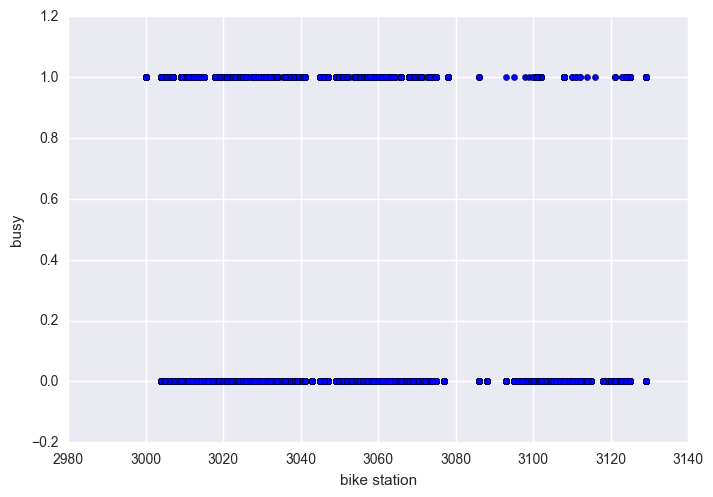

In [51]:
import seaborn as sns
sns.plt.scatter(weather_rental['station'],weather_rental['is_busy'])
plt.xlabel('bike station')
plt.ylabel('busy')

# Time to train and predict

In [52]:
train = weather_rental.sample(frac=.8)
test = weather_rental.loc[~weather_rental.index.isin(train.index)]
test.head(3)

,date,hour,station,start_count,end_count,total_docks,mean temp,mean hum,mean wind,mean dew,mean pressure,mean visib,is_busy
0,2015-10-1,0.0,3017.0,1.0,0.0,15.0,61,73,16,52,30.05,8,0
4,2015-10-1,0.0,3052.0,1.0,0.0,25.0,61,73,16,52,30.05,8,0
11,2015-10-1,1.0,3052.0,1.0,0.0,25.0,61,73,16,52,30.05,8,0


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

predictors = list(weather_rental.columns)
predictors.remove('date')
predictors.remove('start_count')
predictors.remove('end_count')
predictors.remove('total_docks')
predictors.remove('is_busy')

reg = RandomForestClassifier(n_estimators=10, max_depth=None, \
                            min_samples_split=10, min_samples_leaf=5, max_features='auto')
reg.fit(train[predictors], train['is_busy'])

pred = reg.predict(test[predictors])
mse = mean_squared_error(test['is_busy'],pred)
print(mse)

print (pred[:5])
print (test['is_busy'].iloc[:5])
test.head(5)

0.0391756330394
[0 0 0 0 0]
0     0
4     0
11    0
19    0
31    0
Name: is_busy, dtype: int64


,date,hour,station,start_count,end_count,total_docks,mean temp,mean hum,mean wind,mean dew,mean pressure,mean visib,is_busy
0,2015-10-1,0.0,3017.0,1.0,0.0,15.0,61,73,16,52,30.05,8,0
4,2015-10-1,0.0,3052.0,1.0,0.0,25.0,61,73,16,52,30.05,8,0
11,2015-10-1,1.0,3052.0,1.0,0.0,25.0,61,73,16,52,30.05,8,0
19,2015-10-1,3.0,3023.0,1.0,0.0,21.0,61,73,16,52,30.05,8,0
31,2015-10-1,5.0,3014.0,1.0,0.0,25.0,61,73,16,52,30.05,8,0


# Pull weather data for today and predict for this hour

In [57]:
req = Request('http://api.wunderground.com/api/1e806efcbfa974b3/geolookup/conditions/q/PA/Philadelphia.json')
data = urlopen(req).read().decode('utf-8')
feed = json.loads(data)

print (feed['location']['city'])
print (feed['current_observation']['temp_f'])
print (feed['current_observation']['wind_mph'])
print (feed['current_observation']['relative_humidity'])


weather_day.columns = ['date','mean temp','mean hum','mean wind','mean dew','mean pressure',\
                      'mean visib']
print(predictors)

import re
re=re.findall(r'\d+', feed['current_observation']['relative_humidity'])
temp=feed['current_observation']['temp_f']
wind=feed['current_observation']['wind_mph']
dew=feed['current_observation']['dewpoint_f']
pressure=feed['current_observation']['pressure_in']
visibility=feed['current_observation']['visibility_mi']
hum=float(re[0])
hour=13.0

data=[[hour,'3004',temp,hum,wind,dew,pressure,visibility]]
today = pd.DataFrame(data,columns=predictors)

print(today)
reg.predict(today[predictors])
              


Philadelphia
62.6
1.7
40%
['hour', 'station', 'mean temp', 'mean hum', 'mean wind', 'mean dew', 'mean pressure', 'mean visib']
   hour station  mean temp  mean hum  mean wind  mean dew mean pressure  \
0  13.0    3004       62.6      40.0        1.7        38         30.48   

  mean visib  
0       10.0  


array([0])